In [78]:
from perceptron import Perceptron
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [79]:
def mean(array):
    return sum(array)/len(array)

def stddev(array):
    _mean = mean(array)
    summation = 0
    for num in array:
        summation += (num - _mean)**2
    return (summation/len(array))**0.5

def plot_solution(X, Y, weights):
    X1 = X[:,0]
    X2 = X[:,1]
    
    get_line_y = lambda x, c0, c1: c0 + c1 * x

    c0 = weights[0]/weights[2]
    c1 = -weights[1]/weights[2]

    lineX = np.array([X1.min(), X1.max()])
    lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

    binary_cmap = ListedColormap(['red', 'blue'])

    fig, ax = plt.subplots(figsize=(8,8))
    ax.set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
           title='Dados de entrada')

    scatter = ax.scatter(X1, X2, c=Y, marker=".", cmap=binary_cmap, linewidth=0)
    ax.plot(lineX, lineY, color="black", alpha= 0.5)

    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
    
def update_fit_info(fit_info, learn, samp, changes):
    fit_info['learning_rate'].append(learn)
    fit_info['sampling_range'].append(samp)
    fit_info['mean'].append(mean(changes))
    fit_info['stddev'].append(stddev(changes))
    fit_info['epochs'].append(len(changes))
    
    return fit_info

In [80]:
data = np.fromfile('../data/data0.txt')
data = data.reshape(data.shape[0]//3, 3)

X = data[:,:-1]
Y = data[:,-1]

fit_info = {
    "learning_rate": [],
    "sampling_range": [],
    "mean": [],
    "stddev": [],
    "epochs": []
}

epochs = 100
p = Perceptron()

## Para η = 0,4 e I = (-100, 100)

In [81]:
p.fit(X, Y, num_epochs = epochs, learning_rate = 0.4, sampling_range = 100)

Pesos iniciais: [-28.95970781  -9.89012389  14.72039659]
------ Época 1 ------
Novos pesos: [-28.55970781  -9.88952642  14.73472373]
Novos pesos: [-28.15970781  -9.8944662   14.69372563]
Novos pesos: [-27.75970781  -9.95028459  14.6712973 ]
Novos pesos: [-27.35970781  -9.9172984   14.60836762]
Novos pesos: [-26.95970781  -9.90561697  14.64162465]
Novos pesos: [-26.55970781  -9.87054569  14.65747142]
Novos pesos: [-26.15970781  -9.83674451  14.61862613]
Novos pesos: [-25.75970781  -9.83302269  14.61037476]
Novos pesos: [-25.35970781  -9.75297534  14.60734276]
Novos pesos: [-24.95970781  -9.73815633  14.62163517]
Novos pesos: [-24.55970781  -9.76767789  14.67050344]
Novos pesos: [-24.15970781  -9.74558118  14.73370268]
Novos pesos: [-23.75970781  -9.72042667  14.70222581]
Novos pesos: [-23.35970781  -9.73103883  14.67501258]
Novos pesos: [-22.95970781  -9.71700182  14.69710279]
Novos pesos: [-22.55970781  -9.68937434  14.71585795]
Novos pesos: [-22.15970781  -9.66041975  14.69185447]
Nov

Total de ajustes: 0
------ Época 94 ------
Total de ajustes: 0
------ Época 95 ------
Total de ajustes: 0
------ Época 96 ------
Total de ajustes: 0
------ Época 97 ------
Total de ajustes: 0
------ Época 98 ------
Total de ajustes: 0
------ Época 99 ------
Total de ajustes: 0
------ Época 100 ------
Total de ajustes: 0
*********************
Total de épocas: 100
Total de ajustes de peso: 94


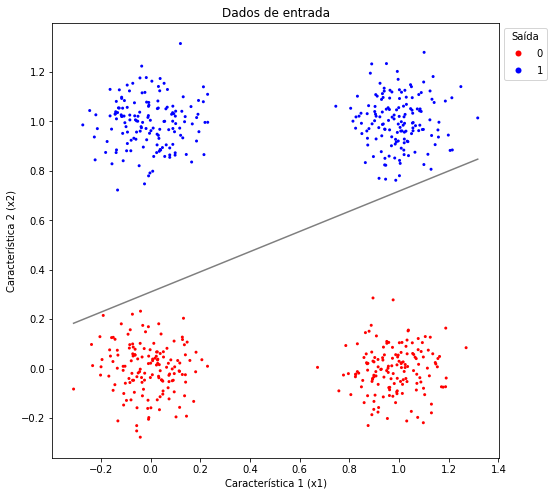

In [82]:
fit_info = update_fit_info(fit_info, 0.4, 100, p.epoch_changes)
plot_solution(X, Y, p.weights)

## Para η = 0,4 e I = (-1, +1)

In [83]:
p.fit(X, Y, num_epochs = epochs, learning_rate = 0.4, sampling_range = 1)

Pesos iniciais: [-0.33440976  0.30467991  0.34052896]
------ Época 1 ------
Novos pesos: [0.06559024 0.30527738 0.3548561 ]
Novos pesos: [0.46559024 0.2923955  0.28227455]
Novos pesos: [0.06559024 0.22997806 0.61350532]
Novos pesos: [ 0.46559024 -0.08838763  0.62150073]
Novos pesos: [0.06559024 0.28991765 0.92791376]
Total de ajustes: 5
------ Época 2 ------
Novos pesos: [0.46559024 0.28497786 0.88691566]
Novos pesos: [ 0.86559024 -0.19022258  0.82129067]
Novos pesos: [0.46559024 0.1858585  1.27010564]
Total de ajustes: 3
------ Época 3 ------
Novos pesos: [ 0.86559024 -0.20460126  1.15887618]
Novos pesos: [0.46559024 0.17370401 1.4652892 ]
Total de ajustes: 2
------ Época 4 ------
Novos pesos: [ 0.86559024 -0.21675575  1.35405973]
Novos pesos: [0.46559024 0.16154952 1.66047276]
Total de ajustes: 2
------ Época 5 ------
Novos pesos: [ 0.86559024 -0.22891024  1.54924329]
Total de ajustes: 1
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 

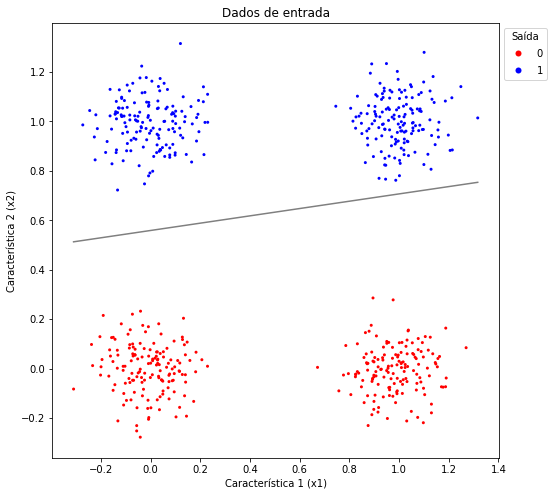

In [84]:
fit_info = update_fit_info(fit_info, 0.4, 1, p.epoch_changes)
plot_solution(X, Y, p.weights)

## Para η = 0,4 e I = (-0.5, 0.5)

In [85]:
p.fit(X, Y, num_epochs = epochs, learning_rate = 0.4, sampling_range = 0.5)

Pesos iniciais: [ 0.14193416 -0.05470678 -0.037612  ]
------ Época 1 ------
Novos pesos: [-0.25806584 -0.11712422  0.29361876]
Novos pesos: [ 0.14193416 -0.43548991  0.30161418]
Novos pesos: [-0.25806584 -0.05940883  0.75042915]
Total de ajustes: 3
------ Época 2 ------
Novos pesos: [ 0.14193416 -0.05881135  0.76475629]
Novos pesos: [ 0.54193416 -0.01139464  0.69225781]
Novos pesos: [ 0.14193416 -0.01486099  1.00399604]
Novos pesos: [ 0.54193416 -0.49006143  0.93837105]
Novos pesos: [ 0.14193416 -0.02744151  1.32436871]
Total de ajustes: 5
------ Época 3 ------
Novos pesos: [0.54193416 0.00554468 1.26143903]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época 5 ------
Total de ajustes: 0
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 8 ------
Total de ajustes: 0
------ Época 9 ------
Total de ajustes: 0
------ Época 10 ------
Total de ajustes: 0
------ Época 11 ------
Total de ajustes: 0
------ Época 12 ------
Tot

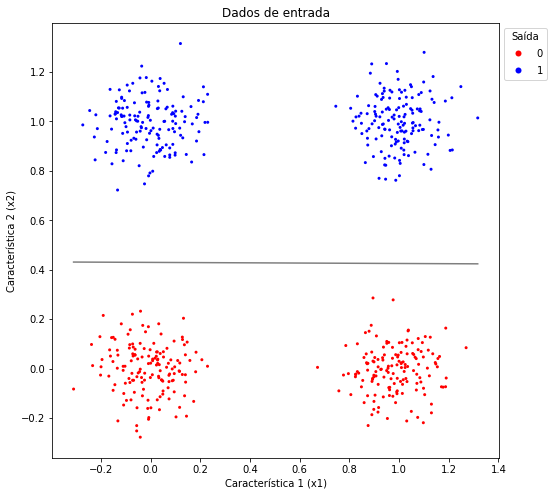

In [86]:
fit_info = update_fit_info(fit_info, 0.4, 0.5, p.epoch_changes)
plot_solution(X, Y, p.weights)

In [87]:
p.fit(X, Y, num_epochs = epochs, learning_rate = 0.1, sampling_range = 100)

Pesos iniciais: [ 38.89679371  -7.82834915 -29.4717031 ]
------ Época 1 ------
Novos pesos: [ 38.79679371  -7.84395352 -29.38889541]
Novos pesos: [ 38.69679371  -7.83722264 -29.27603805]
Novos pesos: [ 38.59679371  -7.84293264 -29.18039645]
Novos pesos: [ 38.49679371  -7.860495   -29.0885697 ]
Novos pesos: [ 38.39679371  -7.84618002 -29.00198319]
Novos pesos: [ 38.29679371  -7.84256145 -28.88965864]
Novos pesos: [ 38.19679371  -7.83372024 -28.78962063]
Novos pesos: [ 38.09679371  -7.82648606 -28.69301296]
Novos pesos: [ 37.99679371  -7.83492491 -28.59050058]
Novos pesos: [ 37.89679371  -7.8232568  -28.49325804]
Novos pesos: [ 37.79679371  -7.81321599 -28.3891641 ]
Novos pesos: [ 37.69679371  -7.80758011 -28.30336785]
Novos pesos: [ 37.59679371  -7.80428646 -28.21027722]
Novos pesos: [ 37.49679371  -7.78244405 -28.11073153]
Novos pesos: [ 37.39679371  -7.78677878 -27.99320946]
Novos pesos: [ 37.29679371  -7.79322409 -27.8910068 ]
Novos pesos: [ 37.19679371  -7.78978615 -27.80312828]
Nov

Total de ajustes: 0
------ Época 33 ------
Total de ajustes: 0
------ Época 34 ------
Total de ajustes: 0
------ Época 35 ------
Total de ajustes: 0
------ Época 36 ------
Total de ajustes: 0
------ Época 37 ------
Total de ajustes: 0
------ Época 38 ------
Total de ajustes: 0
------ Época 39 ------
Total de ajustes: 0
------ Época 40 ------
Total de ajustes: 0
------ Época 41 ------
Total de ajustes: 0
------ Época 42 ------
Total de ajustes: 0
------ Época 43 ------
Total de ajustes: 0
------ Época 44 ------
Total de ajustes: 0
------ Época 45 ------
Total de ajustes: 0
------ Época 46 ------
Total de ajustes: 0
------ Época 47 ------
Total de ajustes: 0
------ Época 48 ------
Total de ajustes: 0
------ Época 49 ------
Total de ajustes: 0
------ Época 50 ------
Total de ajustes: 0
------ Época 51 ------
Total de ajustes: 0
------ Época 52 ------
Total de ajustes: 0
------ Época 53 ------
Total de ajustes: 0
------ Época 54 ------
Total de ajustes: 0
------ Época 55 ------
Total de aj

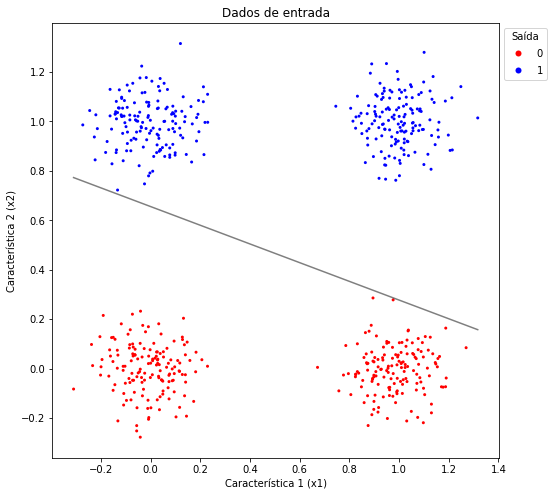

In [88]:
fit_info = update_fit_info(fit_info, 0.1, 100, p.epoch_changes)
plot_solution(X, Y, p.weights)

In [89]:
pd.DataFrame.from_dict(fit_info)

,learning_rate,sampling_range,mean,stddev,epochs
0,0.4,100.0,15.666667,30.131195,6
1,0.4,1.0,9.727273,23.203021,11
2,0.4,0.5,8.285714,20.765454,14
3,0.1,100.0,22.125000,61.796246,24
